In [15]:
from pathlib import Path
from urllib.request import urlretrieve
import zipfile

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 150

In [3]:
DATA_DIR = Path("../data").resolve()

In [4]:
[dp.name for dp in DATA_DIR.iterdir()]

['bdc_17_FibertothePremises_fixed_broadband_J23_23jan2024.zip',
 'bdc_17_Cable_fixed_broadband_J23_23jan2024.zip',
 '.ipynb_checkpoints']

In [16]:
def read_zipped_csv(zip_file_path: Path, file_name: str) -> pd.DataFrame:
    with zipfile.ZipFile(zip_file_path) as zip_ref:
        with zip_ref.open(file_name) as f:
            return pd.read_csv(f)

def download_file(url: str, file_path: Path) -> None:
    if not file_path.is_file():
        urlretrieve(url=url, filename=file_path)

In [13]:
file_path = DATA_DIR.joinpath("bdc_17_FibertothePremises_fixed_broadband_J23_23jan2024.zip")

with zipfile.ZipFile(file_path) as zip_ref:
    with zip_ref.open(file_path.name.replace(".zip", ".csv")) as f:
        bdc_fiber_df = pd.read_csv(f)

In [14]:
print(bdc_fiber_df.shape)
display(bdc_fiber_df.head(2))

(2178534, 12)


,frn,provider_id,brand_name,location_id,technology,max_advertised_download_speed,max_advertised_upload_speed,low_latency,business_residential_code,state_usps,block_geoid,h3_res8_id
0,2860856,130077,AT&T Inc,1015499874,50,5000,5000,1,X,IL,171978835043042,8826644eebfffff
1,2860856,130077,AT&T Inc,1015570673,50,1000,1000,1,X,IL,171978810092011,8826644ac5fffff


In [17]:
block_group_file_path = DATA_DIR.joinpath("tl_2023_17_bg.zip")
download_file(
    url="https://www2.census.gov/geo/tiger/TIGER2023/BG/tl_2023_17_bg.zip",
    file_path=block_group_file_path,
)

In [18]:
bg_gdf = gpd.read_file(block_group_file_path)

ERROR 1: PROJ: proj_create_from_database: Open of /home/matt/miniconda3/envs/geo_env/share/proj failed


In [19]:
print(bg_gdf.shape)
bg_gdf.head(2)

(9898, 14)


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,GEOIDFQ,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,17,019,000800,1,170190008001,1500000US170190008001,Block Group 1,G5030,S,2551949,24,+40.1440140,-088.2485074,"POLYGON ((-88.25801 40.14907, -88.25226 40.14911, -88.25202 40.14911, -88.25154 40.14915, -88.25105 40.14911, -88.24857 40.14910, -88.24412 40.149..."
1,17,019,010604,2,170190106042,1500000US170190106042,Block Group 2,G5030,S,106818681,3293,+40.1040759,-088.3977812,"POLYGON ((-88.46336 40.12850, -88.46333 40.13158, -88.46332 40.13279, -88.46328 40.13498, -88.46327 40.13501, -88.46327 40.13503, -88.46327 40.135..."


In [22]:
block_file_path = DATA_DIR.joinpath("tl_2023_17_tabblock20.zip")
download_file(
    url="https://www2.census.gov/geo/tiger/TIGER2023/TABBLOCK20/tl_2023_17_tabblock20.zip",
    file_path=block_file_path,
)

In [23]:
block_gdf = gpd.read_file(block_file_path)

In [24]:
block_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [25]:
print(block_gdf.shape)
block_gdf.head(2)

(369978, 18)


,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,GEOIDFQ20,NAME20,MTFCC20,UR20,UACE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,HOUSING20,POP20,geometry
0,17,039,971800,1037,170399718001037,1010000US170399718001037,Block1037,G5040,U,17884,S,17573,0,+40.1415409,-088.9640653,10,25,"POLYGON ((-88.96460 40.14094, -88.96457 40.14137, -88.96455 40.14202, -88.96455 40.14228, -88.96456 40.14245, -88.96426 40.14244, -88.96397 40.142..."
1,17,039,971700,3065,170399717003065,1010000US170399717003065,Block3065,G5040,U,17884,S,36121,0,+40.1408879,-088.9661442,21,43,"POLYGON ((-88.96745 40.14088, -88.96718 40.14088, -88.96689 40.14088, -88.96675 40.14088, -88.96668 40.14091, -88.96652 40.14107, -88.96648 40.141..."


In [31]:
block_gdf[[
    "GEOID20", "INTPTLAT20", "INTPTLON20", "HOUSING20", "POP20", "geometry"
]].head(2)

,GEOID20,INTPTLAT20,INTPTLON20,HOUSING20,POP20,geometry
0,170399718001037,+40.1415409,-088.9640653,10,25,"POLYGON ((-88.96460 40.14094, -88.96457 40.14137, -88.96455 40.14202, -88.96455 40.14228, -88.96456 40.14245, -88.96426 40.14244, -88.96397 40.142..."
1,170399717003065,+40.1408879,-088.9661442,21,43,"POLYGON ((-88.96745 40.14088, -88.96718 40.14088, -88.96689 40.14088, -88.96675 40.14088, -88.96668 40.14091, -88.96652 40.14107, -88.96648 40.141..."


In [21]:
bg_gdf["GEOID"].str.len().value_counts(dropna=False)

GEOID
12    9898
Name: count, dtype: int64

In [26]:
block_gdf["GEOID20"].str.len().value_counts(dropna=False)

GEOID20
15    369978
Name: count, dtype: int64

In [28]:
bdc_fiber_df["block_geoid"].astype(str).str.len().value_counts(dropna=False)

block_geoid
15    2178534
Name: count, dtype: int64

In [33]:
blk_gdf = block_gdf[[
    "GEOID20", "INTPTLAT20", "INTPTLON20", "HOUSING20", "POP20", "geometry"
]].copy()

In [32]:
bdc_fiber_df.head(1)

,frn,provider_id,brand_name,location_id,technology,max_advertised_download_speed,max_advertised_upload_speed,low_latency,business_residential_code,state_usps,block_geoid,h3_res8_id
0,2860856,130077,AT&T Inc,1015499874,50,5000,5000,1,X,IL,171978835043042,8826644eebfffff


In [36]:
blk_gdf["GEOID20"] = blk_gdf["GEOID20"].astype(str)
bdc_fiber_df["block_geoid"] = bdc_fiber_df["block_geoid"].astype(str)

bdc_fiber_gdf = pd.merge(
    left=bdc_fiber_df,
    right=blk_gdf,
    how="left",
    left_on="block_geoid",
    right_on="GEOID20"
)

In [41]:
bdc_fiber_gdf = gpd.GeoDataFrame(bdc_fiber_gdf)

In [37]:
print(bdc_fiber_gdf.shape)
bdc_fiber_gdf.head(2)

(2178534, 18)


,frn,provider_id,brand_name,location_id,technology,max_advertised_download_speed,max_advertised_upload_speed,low_latency,business_residential_code,state_usps,block_geoid,h3_res8_id,GEOID20,INTPTLAT20,INTPTLON20,HOUSING20,POP20,geometry
0,2860856,130077,AT&T Inc,1015499874,50,5000,5000,1,X,IL,171978835043042,8826644eebfffff,171978835043042,+41.4746577,-087.8788975,19,22,"POLYGON ((-87.87985 41.47400, -87.87973 41.47424, -87.87962 41.47439, -87.87884 41.47552, -87.87880 41.47557, -87.87875 41.47564, -87.87865 41.475..."
1,2860856,130077,AT&T Inc,1015570673,50,1000,1000,1,X,IL,171978810092011,8826644ac5fffff,171978810092011,+41.5882042,-088.0119402,30,96,"POLYGON ((-88.01390 41.58876, -88.01384 41.58890, -88.01376 41.58896, -88.01314 41.58894, -88.01282 41.58894, -88.01280 41.58879, -88.01276 41.588..."


In [38]:
bdc_fiber_gdf["geometry"].isnull().sum()

0

In [45]:
query = bdc_fiber_gdf["brand_name"].value_counts(dropna=False)
query[:50]

brand_name
AT&T Inc                                      505489
Stratus Networks, Inc.                        495689
Metronet Holdings                             370896
Everstream                                    178730
i3 Broadband                                  130105
Astound_Broadband                              74257
FRONTIER                                       30506
Cass Cable TV INC                              26722
Adams Telsystems Inc.                          25412
Wabash Communications                          25262
Mid Century Telephone Cooperative, Inc.        21167
Surf Internet                                  20657
Pavlov Media                                   20470
Geneseo Communications Services, Inc.          19986
Conxxus                                        19011
Fidium                                         17268
Computer Techniques, Inc.                      16590
McDonough Telephone Cooperative Inc            16304
Bluebird Network LLC               

In [ ]:
bdc_fiber_gdf.dissolve(by="brand_name")

In [40]:
type(bdc_fiber_gdf)

pandas.core.frame.DataFrame

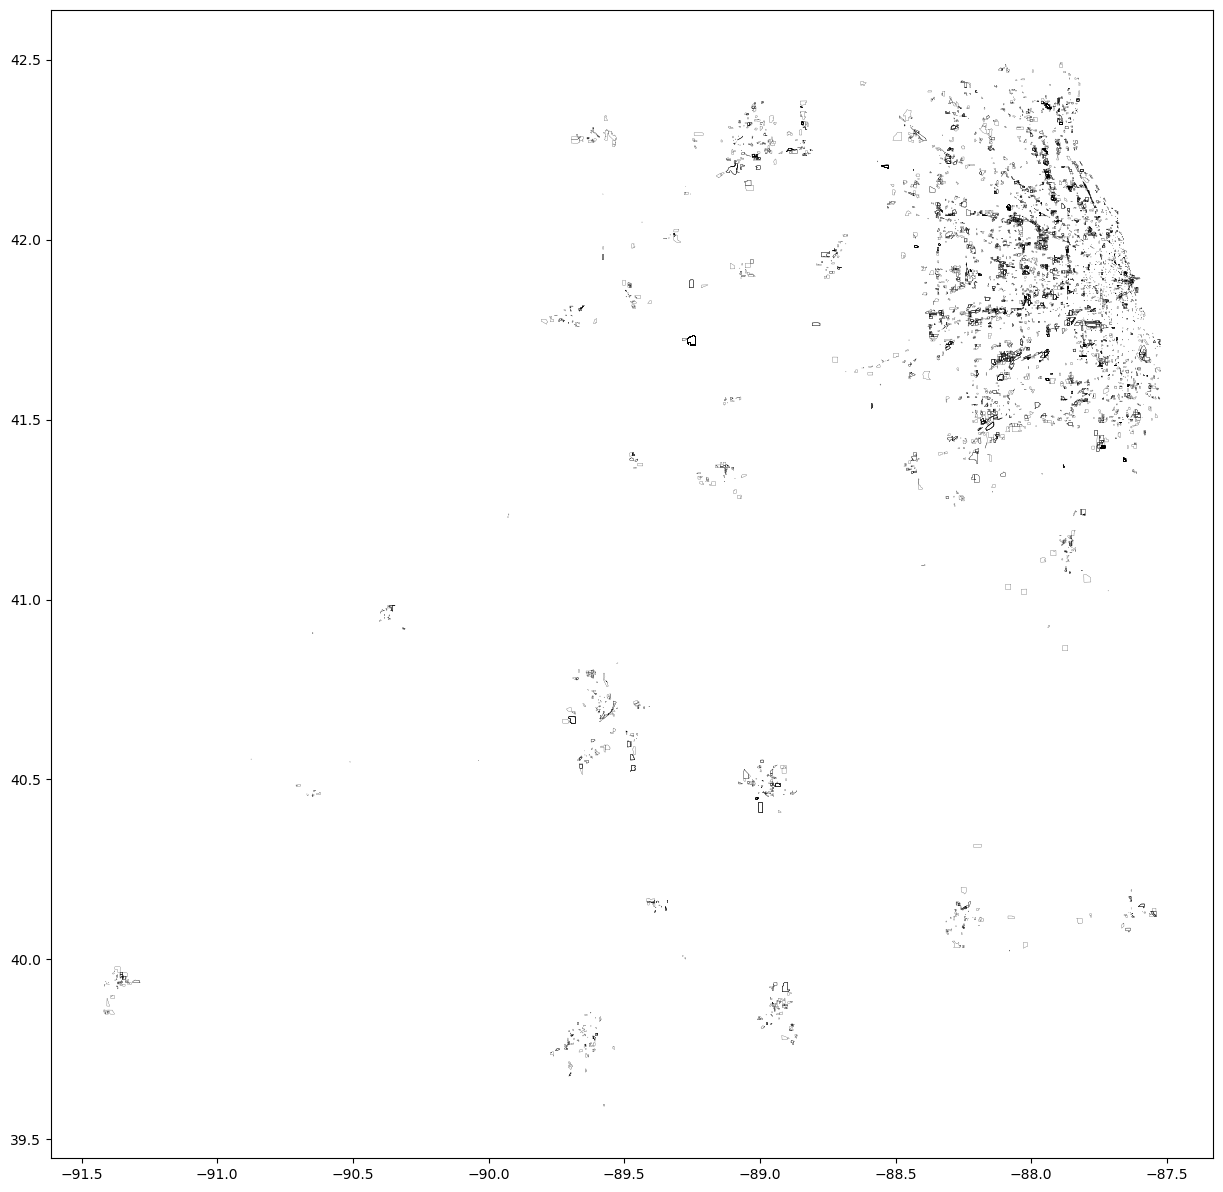

In [48]:
fig_width = 15
brand_name = "Xfinity"

plot_gdf = bdc_fiber_gdf.loc[bdc_fiber_gdf["brand_name"] == brand_name].copy()

fig, ax = plt.subplots(figsize=(fig_width, fig_width))
ax = plot_gdf.plot(facecolor="none", linewidth=0.01*fig_width, ax=ax)